# Лекция 9. Немарковские модели СМО, СМО с приоритетами, оптимизационные решения.

 - Полумарковские, немарковские модели массового обслуживания.
 - Классификация систем с приоритетами. Примеры анализа. 
 - Теоремы Кобхэма. Закон сохранения.
 - Оптимизация решений на основе моделей массового обслуживания.

## Полумарковские, немарковские модели массового обслуживания.

До настоящего времени мы рассматривали только системы класса $M|M|\ldots$, предполагая, что входящий поток, поток обслуживания являются простейшими. Однако иногда приходится иметь дело с системами, для которых либо входящий поток, либо поток обслуживания являются немарковскими. 

Основная трудность здесь состоит в том, что количество заявок в системе в произвольный момент времени перестает быть марковским процессом, т.к. либо поток заявок, либо время обслуживания теперь обладает последействием.
В тоже время такой случайный процесс можно свести к марковскому процессу, поэтому его называют **полумарковским**.



Для решения этой задачи в основном используют два приема: метод вложенных цепей Маркова, метод дополнительной переменной.

### Метод вложенных цепей Маркова

Данный метод базируется на следующих идеях:
- СМО рассматривается не в произвольный момент времени $t$, а в некоторые специальным образом подобранные моменты времени $t_1, t_2,\ldots$.
- Эти моменты времени $t_k$ подбираются так, чтобы процесс $n(t_k)$ - число заявок в системе в момент времени $t_k$ был марковским процессом - цепью Маркова с дискретным временем.

Таким образом, отказавшись рассматривать систему в произвольный момент времени, мы можем опять вернуться к марковским процессам.

Рассмотрим систему $M|G|1|\infty$, пусть на вход поступает простейший поток заявок интенсивностью $\lambda$. Время обслуживания имеет произвольный закон распределения $F(t)$. Если мы будем рассматривать случайную величину $\nu(t)$ - число заявок в системе в момент времени $t$, то для нее проявляется зависимость распределения оставшегося времени дообслуживания от интервала времени, прошедшего с начала обслуживания. Поэтому нужно выбрать такие моменты, в которые этот факт не оказывал бы влияния на будущее.

В качестве $t_k$ выберем моменты окончания обслуживания $k$-й заявки. Пусть $\nu_k$ - число заявок в системе, которое осталось после ухода $k$-й по счету заявки, обозначим $\Delta_k$ - число заявок, которые пришли в систему за время обслуживания $k$-й заявки.
Имеем:
$$\nu_k=\begin{cases} \nu_{k-1}+\Delta_k-1, \nu_{k-1}>0\\
                                     \Delta_k, \nu_{k-1}=0
\end{cases}$$

Легко понять, что поскольку мы отказались рассматривать $\nu(t)$ в произвольный момент времени, то для моментов времени $t_k$ дообслуживания не возникает (заявка уходит из системы уже обслуженной), значит случайная величина $\nu_k$ образует цепь Маркова с дискретным временем.

Пусть $P(\Delta_k=n)$ - вероятность того, что за время обслуживания $k$-й заявки успело прийти $n$ новых заявок. Если время обслуживания $k$-й заявки составило $\tau=t_{k}-t_{k-1}$, то поскольку входящий поток простейший, случайная величина $\Delta_k$ подчиняется закону Пуассона, значит:
$$P(\Delta_k=n)=\frac{(\lambda\tau)^n}{n!}e^{-\lambda\tau}$$

Вероятность того, что $k$-я заявка будет обслуживаться не менее $\tau$ определится как $P(t<\tau)=F(\tau)$ при известном произвольном законе распределения времени обслуживания. Совместное распределение, что обслуживание займет не менее $\tau$ единиц времени и за это время поступит $n$ новых заявок выразится (получается путем усреднения по $\tau$):
$$f_n=\int_{0}^\infty\frac{(\lambda\tau)^n}{n!}e^{-\lambda\tau}dF(\tau)$$

Найдем теперь переходные вероятности. Обозначим $p_{ij}(\nu_k=j| \nu_{k-1}=i)$ - вероятность того, что в момент времени $t_k$ в системе будет находиться $\nu_k=j$ заявок, при условии, что в момент времени $t_{k-1}$ в системе находилось $\nu_{k-1}=i$ заявок.

Если $j<i-1$, то $p_{ij}=0$ (из системы уходит по одной заявке).

Если $i=0$, то $$p_{0j}=f_j=\int_{0}^\infty\frac{(\lambda\tau)^j}{j!}e^{-\lambda\tau}dF(\tau)$$
Если $j\geq i-1$, то $$p_{ij}=f_{j-i+1}=\int_{0}^\infty\frac{(\lambda\tau)^{j-i+1}}{(j-i+1)!}e^{-\lambda\tau}dF(\tau)$$

Окончательно, матрица переходных вероятностей имеет следующий вид:
$$\begin{equation}
P = \begin{pmatrix} f_0 & f_1 & f_2 & f_3 \ldots\\ f_0 & f_1 & f_2 & f_3 \ldots \\0 & f_0 & f_1 & f_3 \ldots \\ 0 & 0 & f_0 & f_1 & \ldots \\ 0 & 0 & 0 & f_0 & \ldots\\ \ldots & \ldots & \ldots & \ldots & \ldots\end{pmatrix} 
\end{equation}$$

Найдем финальные вероятности системы. Нужно отметить, что для их существования должны выполняться необходимые условия - интенсивность входящего потока должна быть меньше интенсивности потока обслуживания: $\frac{\lambda}{\mu}=\lambda\cdot M[\tau]<1$, где $M[\tau]=\frac{1}{\mu}=\int_0^\infty \tau dF(\tau)$.

Обозначим $\pi_n=\lim_{k\rightarrow \infty}P(\nu_k=n), n=0, 1, 2, \ldots$ - вероятность того, что в момент времени $t_k, k\rightarrow\infty$ в системе будет $n$ заявок.

В лекции 3 для нахождения стационарных вероятностей цепи Маркова с дискретным временем мы использовали условие:
$\pi\cdot (P-E)=0$, где $\pi = (\pi_0 \pi_1 \pi_2 \pi_3 \ldots)$- вектор-строка, а также условие нормировки $\sum_{n=0}^\infty\pi_n=1$. Тогда получаем:
$$(\pi_0 \pi_1 \pi_2 \pi_3 \ldots)\cdot \begin{pmatrix} 1 & f_1 & f_2 & f_3 \ldots\\ 1 & f_1-1 & f_2 & f_3 \ldots \\1 & f_0 & f_1-1 & f_3 \ldots \\ 1 & 0 & f_0 & f_1-1 & \ldots \\ 1 & 0 & 0 & f_0 & \ldots\\ \ldots & \ldots & \ldots & \ldots & \ldots\end{pmatrix}=(1 0 0 0 \ldots)$$

Это приводит к системе уравнений:
\\begin{cases} \sum_{n=0}^\infty\pi_n=1\\
               \pi_n = \pi_0f_n+\sum_{j=0}^n \pi_{n-j+1}\cdot f_{j}, n=1, 2, 3, \ldots\tag{1}
\end{cases}

Введем в рассмотрение производящие функции 
$$f(z)=\sum_{n=0}^\infty f_nz^n, \pi(z)=\sum_{n=0}^\infty \pi_nz^n$$

Умножив каждое $\pi_n$ из системы (1) на $z^n$ и сложив их все, получим:
$$\pi(z) = \sum_{n=0}^\infty\pi_n z^n = \pi_0\cdot f(z)+\sum_{n=0}^\infty z^n\cdot \sum_{j=0}^n\pi_{n-j+1}\cdot f_j \tag{2}$$

Выполним преобразования
$$\sum_{n=0}^\infty z^n\cdot \sum_{j=0}^n\pi_{n-j+1}\cdot f_j = \sum_{j=0}^\infty f_j\sum_{n=j}^\infty\pi_{n-j+1}\cdot z^n=\sum_{j=0}^\infty f_j\cdot z^j\cdot \sum_{n=j}^\infty\pi_{n-j+1}\cdot z^{n-j}=\sum_{j=0}^\infty f_jz^j\left(\sum_{k=0}^\infty\pi_{k+1}z^k\right)$$

В последнем выражении принято $k=n-j$, далее получаем:
$$\sum_{k=0}^\infty\pi_{k+1}z^k=\frac{\pi(z)-\pi_0}{z}$$
$$\sum_{j=0}^\infty f_jz^j\left(\sum_{k=0}^\infty\pi_{k+1}z^k\right)=f(z)\cdot\frac{\pi(z)-\pi_0}{z}$$

Тогда из уравнения (2) получаем:
$$\pi(z)=\pi_0\cdot f(z)+f(z)\cdot\frac{\pi(z)-\pi_0}{z}$$
$$\pi(z)-\frac{f(z)\pi(z)}{z}=\pi_0f(z)-\frac{f(z)\pi_0}{z}$$
$$\pi(z)\left(1-\frac{f(z)}{z}\right)=\pi_0f(z)\left(1-\frac{1}{z}\right)$$
$$\pi(z)=\frac{\pi_0 f(z)(z-1)}{z-f(z)}\tag{3}$$

Выразим теперь $\pi_0$:
$$\lim_{z\rightarrow 1}\pi(z) = \sum_{n=0}^\infty\pi_n=1=\pi_0\lim_{z\rightarrow 1}\frac{f(z)(z-1)}{z-f(z)}$$

Для нахождения предела воспользуемся правилом Лопиталя, а также учтем условие нормировки $f(1)=1$:
$$1=\pi_0\lim_{z\rightarrow 1}\frac{f(z)(z-1)}{z-f(z)}=\pi_0\lim_{z\rightarrow 1}\frac{f'(z)z-f'(z)+f(z)}{1-f'(z)}=\pi_0\frac{1}{1-f'(1)}$$
Отсюда получаем $\pi_0=1-f'(1)$.

Таким образом, формулу (3) можно переписать следующим образом:
$$\pi(z) = \frac{(1-f'(1))\cdot f(z)\cdot(z-1)}{z-f(z)}\tag{4}$$

Формула (4) позволяет выразить среднее число заявок, находящихся в системе:
$$L_{\text{сист}}=\pi'(z)|_{z=1}=\left(\sum_{n=0}^\infty n\cdot z^{n-1}\cdot \pi_n\right)|_{z=1}$$
[Wolfram](https://www.wolframalpha.com/input?i=diff%28f%28z%29*%28z-1%29%2F%28z-f%28z%29%29%2Cz%29)
$$L_{\text{сист}}=\pi'(z)|_{z=1}=(1-f'(1))\cdot\lim_{z\rightarrow 1}\left(\frac{(z-1)zf'(z)-f^2(z)+f(z)}{(z-f(z))^2}\right)$$

Поскольку $f(1)=1$, при взятии предела возникает неопределенность, поэтому воспользуемся правилом Лопиталя:
$$L_{\text{сист}}=(1-f'(1))\cdot \lim_{z\rightarrow 1}\frac{f''(z)(z^2-z)+2zf'(z)-f'(z)-2f(z)f'(z)+f'(z)}{2(z-f(z))(1-f'(z))}$$
$$L_{\text{сист}}=(1-f'(1))\cdot \lim_{z\rightarrow 1}\frac{f''(z)(z^2-z)+2zf'(z)-2f(z)f'(z)}{2(z-f(z))(1-f'(1))}$$
$$L_{\text{сист}}=\lim_{z\rightarrow 1}\frac{f''(z)(z^2-z)+2zf'(z)-2f(z)f'(z)}{2(z-f(z))}$$
$$L_{\text{сист}}=\lim_{z\rightarrow 1}\frac{f''(z)(z^2-z)}{2(z-f(z))}+\frac{2f'(z)(z-f(z))}{2(z-f(z))}$$
$$L_{\text{сист}}=\lim_{z\rightarrow 1}\left(\frac{f''(z)(z^2-z)}{2(z-f(z))}+f'(z)\right)$$
$$L_{\text{сист}}=\lim_{z\rightarrow 1}\left(\frac{f''(z)(z^2-z)}{2(z-f(z))}\right)+f'(1)$$

Для последнего выражения опять используем правило Лопиталя:
$$L_{\text{сист}}=f'(1)+\lim_{z\rightarrow 1}\frac{f'''(z)(z^2-z)+2zf''(z)-f''(z)}{2(1-f'(z))}$$
$$L_{\text{сист}}=f'(1)+\frac{f''(1)}{2(1-f'(1))} \tag{5}$$

Остается найти явное выражение для $f(z)$.

$$f(z)=\sum_{n=0}^\infty f_nz^n=\sum_{n=0}^\infty z^n \int_{0}^\infty\frac{(\lambda\tau)^n}{n!}e^{-\lambda\tau}dF(\tau)=\int_{0}^\infty\left(\sum_{n=0}^\infty\frac{(\lambda\tau z)^n}{n!}\right)\cdot e^{-\lambda\tau}dF(\tau)$$

$$f(z)=\int_0^\infty e^{\lambda\tau z}e^{-\lambda \tau}dF(\tau)=\int_0^\infty e^{-\lambda(1-z)\tau}dF(\tau) \tag{6}$$

$$\frac{f(z)}{dz} = \lambda\int_{0}^\infty \tau\cdot e^{-\lambda(1-z)\tau}dF(\tau)$$

$$f'(1)=\lambda\int_{0}^\infty\tau dF(\tau) = \lambda M[\tau]$$

$$\frac{d^2f(z)}{dz^2}=\lambda^2\int_{0}^\infty \tau^2\cdot e^{-\lambda(1-z)\tau} dF(\tau)$$

$$f''(1) = \lambda^2\int_{0}^\infty \tau^2 dF(\tau)$$

Интеграл в последнем выражении - это начальный момент второго порядка случайной величины $\tau$, он имеет выражение через дисперсию:
$$D[\tau]=\int_0^\infty(\tau-M[\tau])^2dF(\tau)=\int_0^\infty\tau^2dF(\tau)-2M[\tau]\cdot\int_0^\infty \tau dF(\tau)+M^2[\tau]$$
$$D[\tau]=\int_0^\infty\tau^2dF(\tau)-2M^2[\tau]+M^2[\tau]$$
$$f''(1) = \lambda^2\int_0^\infty\tau^2dF(\tau) = \lambda^2(D[\tau]+M^2[\tau])$$

Подставляя полученные выражения в формулу (5), получаем:
$$L_{\text{сист}}=\lambda M[\tau]+\frac{\lambda^2(D[\tau]+M^2[\tau])}{2(1-\lambda M[\tau])} \tag{7}$$

Выражение (7) позволяет находить среднее число заявок, находящихся в системе для СМО вида $M/G/1/\infty$, и носит название **формулы Поллачека-Хинчина для среднего значения**.

Подчеркнем, что распределение число требований зависит только от первых двух моментов распределения случайной величины $\tau$. Используя формулу Литтла, можно также найти и остальные параметры системы:
$$T_{\text{сист}}=\frac{L_{\text{сист}}}{\lambda}=M[\tau]+\frac{\lambda(D[\tau]+M^2[\tau])}{2(1-\lambda M[\tau])} \tag{8}$$
$$W_{\text{оч}}=T_{\text{сист}}-M[\tau]=\frac{\lambda(D[\tau]+M^2[\tau])}{2(1-\lambda M[\tau])} \tag{9}$$
$$L_{\text{оч}} = W_{\text{оч}}\cdot \lambda = \frac{\lambda^2(D[\tau]+M^2[\tau])}{2(1-\lambda M[\tau])} \tag{10}$$

Вспоминая, что преобразование Лапласа-Стилтьеса:
$$B(s)=\int_0^\infty e^{-s\tau}dF(\tau)$$
и сопоставляя это с формулой (6), получаем:
$$f(z)=B(\lambda(1-z))$$

Тогда используя формулу (4), получаем:

$$\pi(z) = \frac{(1-\lambda M[\tau])\cdot B(\lambda(1-z))\cdot(z-1)}{z-B(\lambda(1-z))}\tag{11}$$

Формула (11) называется **формулой Поллачика-Хинчина для преобразования**, которая позволяет вычислять значения стационарных  вероятностей нахождения в СМО $n=0,1,2,3,\ldots$ заявок в моменты окончания обслуживания при $t_k, k\rightarrow \infty$. (Данное уравнение было получено в 1932 году А.Я. Хинчиным.)

Рассмотрим ряд примеров на использование формул Поллачека-Хинчина (7)-(11).

**Пример 1.**

Рассмотрим в качестве примера экспоненциальное распределение закона обслуживания:
$F(t) = 1-e^{-\mu t}$
$$M[\tau]=\frac{1}{\mu}, D[\tau] = \frac{1}{\mu^2}$$
Обозначим $y=\frac{\lambda}{\mu}$, тогда по формуле (7) имеем:
$$L_{\text{сист}}=y+\frac{2y^2}{2(1-y)}=\frac{y}{1-y}$$

Это совпадает с известной нам формулой (см. формулу (1) лекции 4). Аналогично получаем остальные показатели.

Теперь воспользуемся формулой (11), чтобы получить $\pi_n = \lim_{k\rightarrow \infty}P(\nu_k=n), n=0, 1, 2, \ldots$ - вероятность того, что в момент времени $t_k, k\rightarrow\infty$ в системе будет $n$ заявок:
$$B(s) = B(\lambda-\lambda z) = \int_0^\infty e^{-st}dF(t) = \int_0^\infty \mu e^{-\mu t}e^{-st}dt$$


$$B(s) = \mu\int_0^\infty e^{-(\mu+s)t}dt = -\frac{\mu}{\mu+s}\int_0^\infty d e^{-(\mu+s)t} =\frac{\mu}{\mu+s}=\frac{\mu}{\mu+\lambda-\lambda z}$$

$$\pi(z) = \frac{\left(1-\frac{\lambda}{\mu}\right)(z-1)}{z-\frac{\mu}{\mu+\lambda-\lambda z}}\cdot \frac{\mu}{\mu+\lambda-\lambda z}=\frac{(z-1)(\mu-\lambda)}{\mu z+\lambda z -\lambda z^2 - \mu}= \frac{(1-z)(\mu-\lambda)}{\lambda z^2-(\mu+\lambda)z +\mu}$$

Выражение $\lambda z^2-(\mu+\lambda)z +\mu$ разложим на множители по $z$:
$$z_{1,2} = \frac{\mu+\lambda\pm\sqrt{(\mu+\lambda)^2-4\mu\lambda}}{2\lambda} = \frac{\mu+\lambda\pm|\mu-\lambda|}{2\lambda}$$

Поскольку $\frac{\lambda}{\mu}<1\Rightarrow \mu-\lambda >0$, то
$$z_1 = \frac{\mu}{\lambda}, z_2 = 1$$
$$\lambda z^2-(\mu+\lambda)z +\mu = \lambda(z-1)(z-\frac{\mu}{\lambda})$$

$$\pi(z) = \frac{(1-z)(\mu-\lambda)}{\lambda(z-1)\left(z-\frac{\mu}{\lambda}\right)} = \frac{1-y}{1-yz}, y = \frac{\lambda}{\mu}$$

Последнее выражение разложим в ряд по переменной $z$:

[Wolfram](https://www.wolframalpha.com/input?i=series%28+%281-y%29%2F%281-y*z%29%2C+z%29)

$$\pi(z) = (1-y) +(1-y)yz+(1-y)y^2z^2+(1-y)y^3z^3+\ldots \tag{12}$$

Как видно, полученный результат $P_0 = (1-y), P_k = (1-y)y^k$ совпадает с вероятностями нахождения системы $M/M/1/\infty$ в состояниях $S_0, S_k$  из лекции 4. Однако, равенство (12) получено для момента ухода обслуженных заявок, в то время как результаты в лекции 4 справедливы для любого момента времени. 

Это совпадение не является случайным. Во вложенных цепях Маркова мы устраняли наличие последействия рассмотрением только определенных моментов времени - ухода обслуженных заявок.

Но легко понять, что последействие будет отсутствовать и когла мы будем рассматривать заявки за секунду до или после ухода обслуженной (в общем случае в любой фиксированный момент времени от события ухода обслуженных заявок). При отсутствии последействия все рассуждения остаются в силе для этих моментов времени. Таким образом, вложенные марковские цепи дают решение, справедливое для любых точек оси времени. 

**Пример 2.**

Рассмотрим теперь систему с детерминированным временем обслуживания $M/D/1/\infty$. В ней $M[\tau]=T$ - постоянная величина времени обслуживания, $D[\tau] = 0$, тогда получаем:
$$L_{\text{сист}} = \lambda T+\frac{\lambda^2 T^2}{2(1-\lambda T)} = \frac{2\lambda T-\lambda^2 T^2}{2(1-\lambda T)}$$

$$T_{\text{сист}} = \frac{2T-\lambda T^2}{2(1-\lambda T)}$$

$$W_{\text{оч}} = \frac{\lambda T^2}{2(1-\lambda T)}$$

$$L_{\text{оч}} = \frac{\lambda^2 T^2}{2(1-\lambda T)}$$

Зададимся числовыми значениями $\lambda = 3, T =0.3$, условие $\lambda\cdot T=3\cdot 0.3 <1$ - выполняется. 

Проведем расчет по полученным формулам, а также выполним моделирование и сравним результаты.

In [8]:
lambda <- 3
T <- 0.3
Lsys <- (2*lambda*T-lambda^2*T^2)/(2*(1-lambda*T))
Woch <- lambda*T^2/(2*(1-lambda*T))
Tsys<-(2*T-lambda*T^2)/(2*(1-lambda*T))
Loch<-lambda^2*T^2/(2*(1-lambda*T))
cat("Lsys = ", Lsys)
cat("\nTsys = ", Tsys)
cat("\nLoch = ", Loch)
cat("\nWoch = ", Woch)

Lsys =  4.95
Tsys =  1.65
Loch =  4.05
Woch =  1.35

In [12]:
#Моделирование детерминированного обслуживания

library(simmer)
library(simmer.plot)

my.trajectory2 <- trajectory() %>%
  seize("server", amount=1) %>%
  timeout(T) %>%
  release("server", amount=1)

Tmodel<-200000
md_1_inf <- simmer() %>%
  add_resource("server", capacity=1, queue_size=Inf) %>%
  add_generator("arrival", my.trajectory2, function() rexp(1, lambda)) %>%
  run(until=Tmodel)

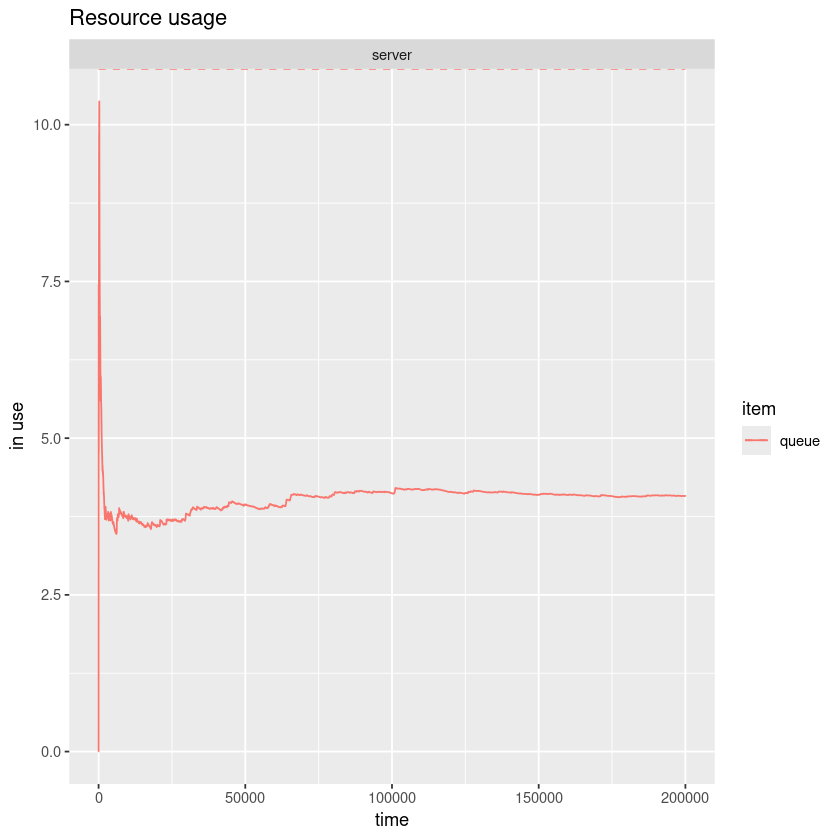

In [13]:
#Находим среднюю длину очереди
plot(get_mon_resources(md_1_inf), "usage", "server", items="queue")

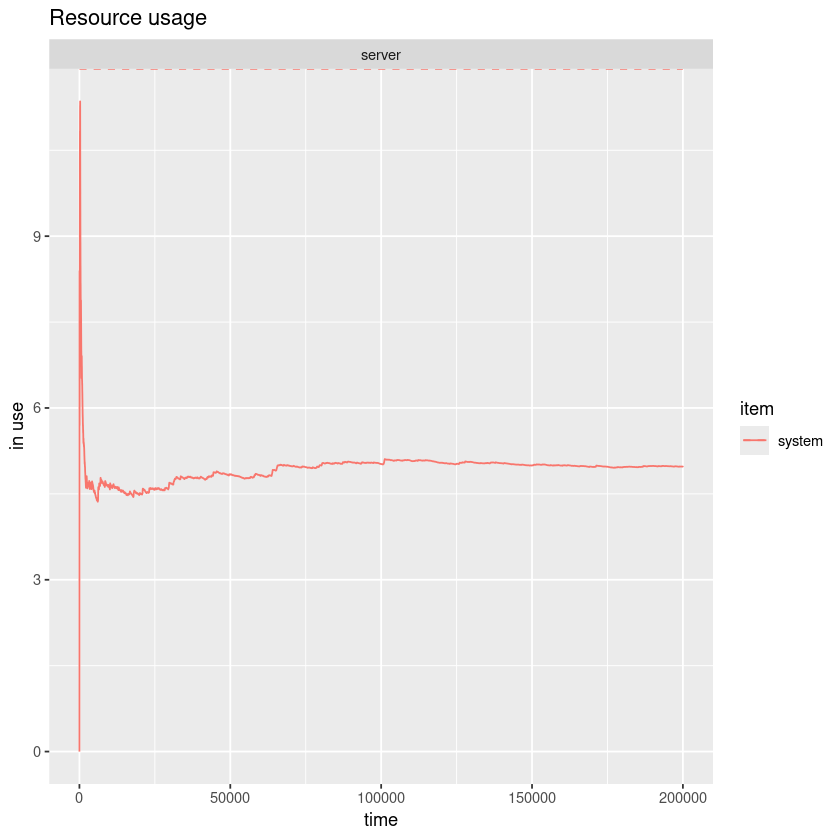

In [14]:
#Находим среднее число заявок в системе
plot(get_mon_resources(md_1_inf), "usage", "server", items="system")

In [15]:
res_arrivals <- get_mon_arrivals(md_1_inf)
cat("Tsys =", mean(res_arrivals$end_time - res_arrivals$start_time))
cat("\nWoch =", mean(res_arrivals$end_time - res_arrivals$start_time-res_arrivals$activity_time))

Tsys = 1.659901
Woch = 1.359901

### Системы класса $GI/GI/1/\infty$ - немарковские процессы

В общем случае для такого рода систем не существует точных формул.

Пусть входящий поток и поток обслуживания являются стационарными, ординарными с ограниченным последействием и произвольным законом распределения интервалов времени между моментами поступления заявок в систему (для входящего потока) и между моментами времени ухода заявки обслуженной (для потока обслуживания). Такие потоки называются **рекуррентными** и обозначаются $GI$.

Итак, будем рассматривать систему $GI/GI/1/\infty$, в которую поступает рекуррентный поток заявок с интенсивностью $\lambda$. Интервалы времени между заявками – независимые случайные величины функцией распределения $А(t)$, средним значением $M[\tau] =\bar{\tau} = \frac{1}{\lambda}$, и коэффициентом вариации $v_\tau = \frac{\sigma_\lambda}{\bar{\tau}}=\lambda\cdot \sigma_{\tau}$ и дисперсией $D[\tau] = \sigma^2_\tau$. Время обслуживания заявки в системе $x$ также независимая случайная величина со средним значением $M[x] = \bar{x}=\frac{1}{\mu}$, которая имеет произвольную функцию распределения $В(t)$ и коэффициент вариации $v_{\mu}=\frac{\sigma_x}{\bar{x}}=\mu\cdot\sigma_x$, дисперсию $D[x]=\sigma^2_x$. Поскольку число каналов в системе $k = 1$, то ее коэффициент загрузки $y=\frac{\lambda}{\mu}$.

Для такой системы известны следующие результаты:

- **Неравенство Кингмана - Келлерстрема** [1, 2, 3, 4] - верхнее ограничение на длину очереди:
$$L_{\text{оч}}\leq \frac{v_\lambda^2+y^2v_\mu^2}{2(1-y)} \tag{13}$$
- в [1, 2] приводится также нижнее ограничение:
$$L_{\text{оч}}\geq \frac{y^2v_\mu^2}{2(1-y)}-\frac{y}{2} \tag{14}$$
 - в [1, 2, 3]  обосновывается, что на практике удобнее пользоваться **формулой Файнберга**:
 $$L_{\text{оч}}\approx \frac{y^2(v_\lambda^2+v_\mu^2)}{2(1-y)} \tag{15}$$
 Используя формулу (15) и формулу Литтла, можно выразить остальные характеристики системы:
 $$W_{\text{оч}} \approx \frac{y^2(v_\lambda^2+v_\mu^2)}{2\lambda(1-y)} \tag{16}$$
 $$L_{\text{сист}}\approx \frac{y^2(v_\lambda^2+v_\mu^2)}{2(1-y)}+y \tag{17}$$
 $$T_{\text{сист}}\approx \frac{y^2(v_\lambda^2+v_\mu^2)}{2\lambda(1-y)}+\frac{1}{\mu} \tag{18}$$

- В [5] используется еще одна аппроксимация, получившая название **аппроксимация Маршалла**:

$$W_{\text{оч}}\approx \frac{y M[x]}{2(1-y)}\cdot \left(\frac{D[\tau]+D[x]}{M^2[x]}\right)\cdot\left(\frac{M^2[x]+D[x]}{M^2[\tau]+D[x]}\right) \tag{19}$$

[1] Задорожный В. Н., Галич  Ю. Г., ОЦЕНКА ТОЧНОСТИ ПРИБЛИЖЕННЫХ ФОРМУЛ ДЛЯ СРЕДНЕЙ ДЛИНЫ ОЧЕРЕДИ /  СИСТЕМЫ УПРАВЛЕНИЯ, ИНФОРМАЦИОННЫЕ ТЕХНОЛОГИИ И МАТЕМАТИЧЕСКОЕ МОДЕЛИРОВАНИЕ. Материалы II Всероссийской научно-практической конференции с международным участием. В 2-х томах . Том I.

[2] Платонов Г. А., Файнберг М. А., Штильман М. С. Поезда, пассажиры и... математика. М. :
Транспорт, – 1977. 239 с.

[3] Вентцель Е. С., Задачи и упражнения по теории вероятностей: Учеб. пособие для студ. втузов / Е. С. Вентцель, Л. А. Овчаров. — 5-е изд., испр. — М.: Издательский центр «Академия», 2003. — 448 с.

[4] Клейнрок Л. Вычислительные системы с очередями / пер. с англ. под ред. Б. С. Цыбакова.
М. : Мир, 1979. – 600 с.

[5] https://studfile.net/preview/11297923/page:7/

**Пример 3.**

Проведем оценку точности этих формул на примере.Например, рассмотрим $E_2/M/1/\infty$ при $\lambda' = 2/5, \mu = 1/3$.
Для потока Эрланга $k$-го порядка справедливо:
$$M[t] = \frac{k}{\lambda'}, D[t] = \frac{k}{\lambda'^2}, v^2 = \frac{D[t]}{M^2[t]} = \frac{1}{k}$$
В нашем случае получаем:
$$M[\tau] = \frac{2}{2/5} = 5, D[\tau] = \frac{2}{4/25} = \frac{25}{2}, v^2_\lambda = \frac{1}{2}, \lambda = \frac{1}{M[\tau]} = 1/5$$

$$M[x] = 3, D[x] = 9, v^2_\mu =1$$

$$y = \frac{\lambda}{\mu} =\frac{3}{5}$$

Расчеты по формуле Файнберга:
$$W_{\text{оч}} \approx \frac{y^2(v_\lambda^2+v_\mu^2)}{2\lambda(1-y)} \approx 3.375$$

$$T_{\text{сист}} = W_{\text{оч}} + \frac{1}{\mu} \approx 6.378$$

$$L_{\text{оч}}\approx \frac{y^2(v_\lambda^2+v_\mu^2)}{2(1-y)} \approx 0.675$$

$$L_{\text{сист}}\approx \frac{y^2(v_\lambda^2+v_\mu^2)}{2(1-y)}+y \approx 1.275$$

In [7]:
y <- 0.6
lambda <-0.2
mu<-0.333
vmu2 <- 1
vlambda2 <- 1/2
Woch<-y^2*(vmu2+vlambda2)/(2*lambda*(1-y));cat('Woch = ',Woch)
Tsys<-Woch+1/mu; cat('\nTsys = ',Tsys)
Loch<-y^2*(vmu2+vlambda2)/(2*(1-y));cat('\nLoch = ',Loch)
Lsys<-Loch+y;cat('\nLsys = ',Lsys)

Woch =  3.375
Tsys =  6.378003
Loch =  0.675
Lsys =  1.275

Расчеты в соответствии с неравенством Кингмана - Келлерстрема:
$$\frac{y^2v_\mu^2}{2(1-y)}-\frac{y}{2}\leq L_{\text{оч}}\leq \frac{v_\lambda^2+y^2v_\mu^2}{2(1-y)}$$
$$0.15\leq L_{\text{оч}}\leq 1.075$$

In [26]:
Lochniz<-y^2*vmu2/(2*(1-y))-y/2;cat('Lochniz = ',Lochniz)
Lochverch<-(vlambda2+y^2*vmu2)/(2*(1-y));cat('\nLochverch = ',Lochverch)

Lochniz =  0.15
Lochverch =  1.075

Расчеты в соответствии с аппроксимацией Маршалла:
$$W_{\text{оч}}\approx \frac{y M[x]}{2(1-y)}\cdot \left(\frac{D[\tau]+D[x]}{M^2[x]}\right)\cdot\left(\frac{M^2[x]+D[x]}{M^2[\tau]+D[x]}\right) \approx 2.85$$

In [8]:
Mx<-3; Mtau<-5; Dlambda<-12.5; Dmu<-9
Woch<-y*Mx/(2*(1-y))*((Dlambda+Dmu)/(Mx^2))*((Mx^2+Dmu)/(Mtau^2+Dmu)); cat('Woch = ',Woch)

Woch =  2.845588

Теперь проведем моделирование.

In [2]:
# https://search.r-project.org/CRAN/refmans/distributions3/html/Erlang.html

install.packages("distributions3")

Устанавливаю пакет в ‘/home/juna/R/x86_64-pc-linux-gnu-library/4.2’
(потому что ‘lib’ не определено)



In [2]:
# Генерим 10 случайных чисел по распределению Эрланга E_5 при lambda' = 2
library(distributions3)
X <- Erlang(5, 2)
random(X,10)


Присоединяю пакет: ‘distributions3’


Следующий объект скрыт от ‘package:stats’:

    Gamma


Следующий объект скрыт от ‘package:grDevices’:

    pdf




[1] 2.795815 2.011322 2.670291 1.969014 5.104636 1.049287 3.661100 1.525318
 [9] 3.234449 3.345249

In [1]:
#Моделирование 
lambda_shtrich <- 2/5; mu <- 1/3

library(simmer)
library(simmer.plot)
library(distributions3)


my.trajectory2 <- trajectory() %>%
  seize("server", amount=1) %>%
  timeout(function() rexp(1,mu)) %>%
  release("server", amount=1)

Tmodel<-800000
E2M1inf <- simmer() %>%
  add_resource("server", capacity=1, queue_size=Inf) %>%
  add_generator("arrival", my.trajectory2, function() random(Erlang(2, lambda_shtrich),1)) %>%
  run(until=Tmodel)

Загрузка требуемого пакета: ggplot2


Присоединяю пакет: ‘simmer.plot’


Следующие объекты скрыты от ‘package:simmer’:

    get_mon_arrivals, get_mon_attributes, get_mon_resources



Присоединяю пакет: ‘distributions3’


Следующий объект скрыт от ‘package:stats’:

    Gamma


Следующий объект скрыт от ‘package:grDevices’:

    pdf




In [3]:
res_arrivals <- get_mon_arrivals(E2M1inf)
cat("Tsys =", mean(res_arrivals$end_time - res_arrivals$start_time))
cat("\nWoch =", mean(res_arrivals$end_time - res_arrivals$start_time-res_arrivals$activity_time))

Tsys = 5.955659
Woch = 2.957153

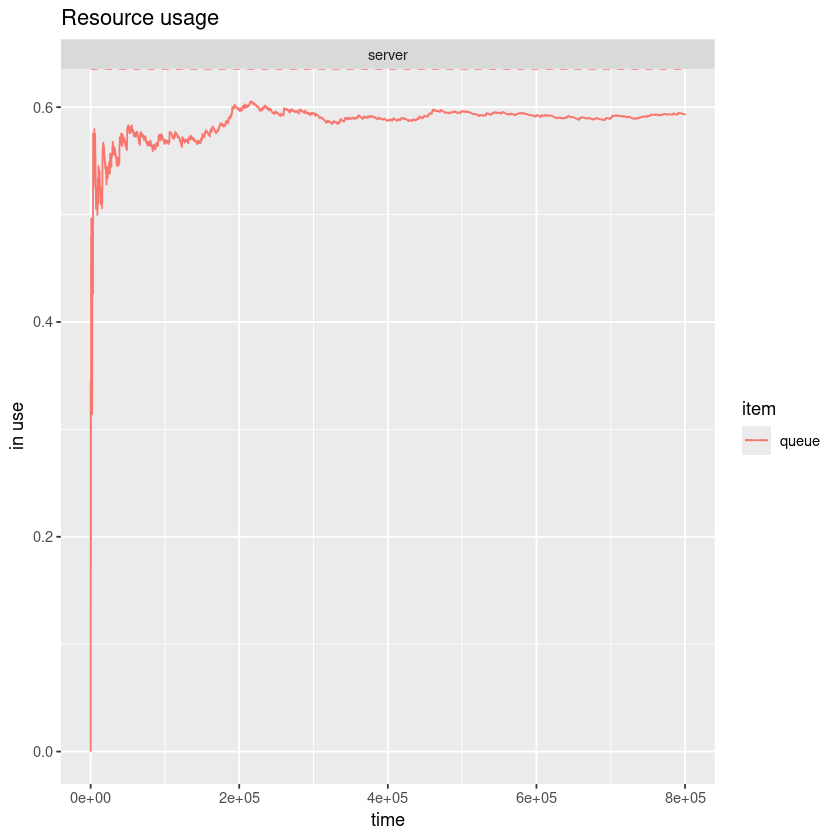

In [4]:
#Находим среднюю длину очереди
plot(get_mon_resources(E2M1inf), "usage", "server", items="queue")

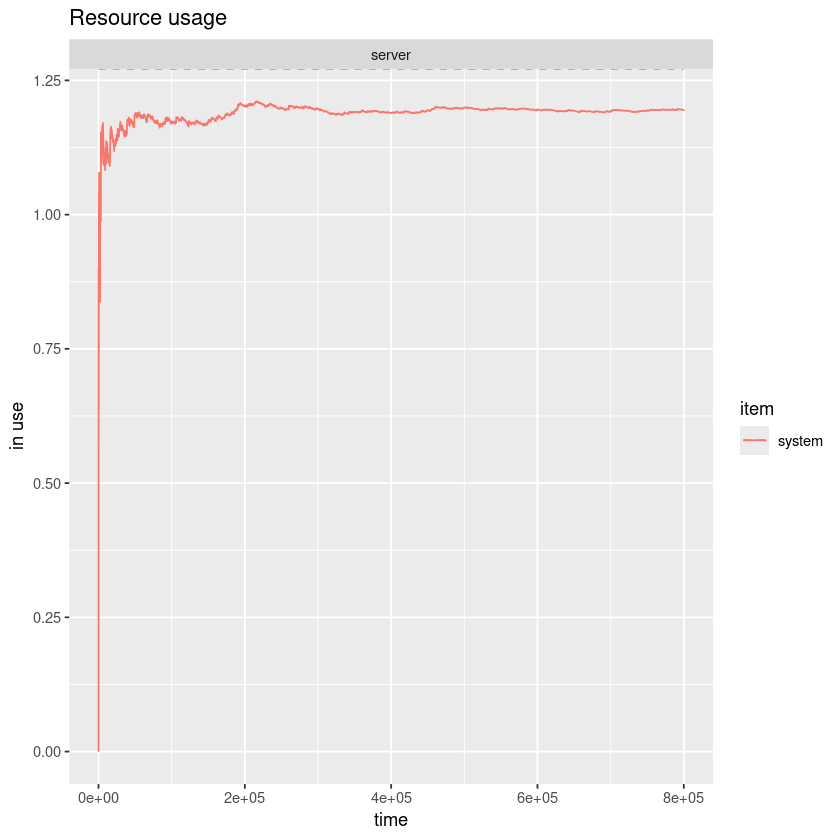

In [5]:
#Находим среднее число заявок в системе
plot(get_mon_resources(E2M1inf), "usage", "server", items="system")

## Классификация систем с приоритетами. Примеры анализа.

До сих пор мы в основном рассматривали однородный поток заявок, в котором все заявки имели одинаковые приоритеты. Однако на практике часто случается иметь дело с заявками, которые имеют разный приоритет. За счет необходимости первоочередного обслуживания заявок с более высоким приоритетом, время нахождения заявок в системе, которые имеют меньший приоритет увеличивается. В зависимости от дисциплины очереди, структуры очереди вводят в рассмотрение различные классы систем:
- Системы с фиксированным приоритетом без прерываний (*относительный приоритет*). В этом классе каждой заявке присваивается один из $P$ различных типов приоритетов. Для заявок с приоритетами $p_i,p_j,p_i<p_j$ заявка с приоритетом $p_j$ имеет преимущество в обслуживании перед заявкой с приоритетом $p_i$. Фиксированный приоритет означает, что $\forall i=\overline{1,P}: p_i=const$ - приоритет заявок не меняется на всех этапах работы СМО. Приоритет без прерываний еще называют *относительным приоритетом* - если в текущий момент обслуживается заявка с приоритетом $p_i$ и приходит заявка с большим приоритетом $p_j>p_i$, то обслуживание заявки с приоритетом $p_i$ не прерывается.

- Системы с фиксированным приоритетом с прерываниями (*абсолютный приоритет*). В этом классе  все также как в предыдущем, но если в момент обслуживания заявки с приоритетом $p_i$ и приходит заявка с большим приоритетом $p_j>p_i$, то обслуживание заявки с приоритетом $p_i$ прерывается, возникает термин *дообслуживание*. Реализация дообслуживания обычно требует дополнительной памяти или мест в очереди, а также памяти для сохранения всех состояний недовыполненной заявки (организацию этих вопросов мы не рассматриваем). Если же отложенная заявка обслуживается заново (без учета ранее затраченного времени на обслуживание), то это обозначается термином *возобновление*.

- Системы приоритета с зависимой задержкой без прерывания. В данном случае в ходе работы системы у заявок меняется приоритет. Чаще всего используют следующую схему: в момент времени $T$ прихода заявки ей присваивается некоторый номер $b_p$, при $0\leq b_1\leq b_2\ldots\leq b_p$, а также приоритет $p=(t-T)\cdot b_p$, где $t$ - текущий момент времени. Таким образом, с увеличением времени приоритет заявки возрастает. Прерывания здесь не допускаются.

- Системы приоритета с зависимой задержкой с прерываниями. Все также, как в предыдущем случае, но здесь заявки могут динамически отправляться на дообслуживание.



**Пример 4.**

В качестве примера рассмотрим одноканальную СМО, в которую поступает неоднородный поток заявок. Ожидающие обслуживания заявки разнесены по разным накопителям ограниченной емкости. Между заявками разных классов установлены относительные приоритеты, означающие, что всякий раз из накопителей на обслуживание выбирается заявка с самым высоким приоритетом. При этом при поступлении в систему высокоприоритетной заявки обслуживание низкоприоритетной не прерывается. При заполненных накопителях поступившая заявка теряется.

Пусть в систему поступает два класса заявок, заявки первого типа имею больший относительный приоритет. Предположим, что длина очереди для обоих накопителей равна 1. Поступающие в систему заявки образуют простейшие потоки с интенсивностями $\lambda_1, \lambda_2$, интенсивность обслуживания $\mu_1, \mu_2$ соответственно. В СМО всегда существует стационарный режим, так как не может быть бесконечных очередей.

Введем в рассмотрение следующие состояния: $S_{i,j,k}$ - первый индекс отвечает за тип заявки, которая проходит обслуживание, $i=0, 1, 2$, второй и третий индексы отвечают за количество заявок в первом и втором накопителях $j=0, 1, k=0, 1$. Тогда имеем следующие состояния:

$S_{0,0,0}$ – в системе нет ни одной заявки;

$S_{1,0,0}$ – на обслуживании в канале находится заявка класса 1;

$S_{2,0,0}$ – на обслуживании в канале находится заявка класса 2;

$S_{1,1,0}$ – на обслуживании находится заявка класса 1 и одна заявка класса 1 ожидает обслуживания в первом накопителе;

$S_{1,0,1}$ – на обслуживании находится заявка класса 1 и одна заявка класса 2 ожидает обслуживания соответственно во втором накопителе;

$S_{2,1,0}$ – на обслуживании находится заявка класса 2 и одна заявка класса 1 ожидает обслуживания в первом накопителе;

$S_{2,0,1}$ – на обслуживании находится заявка класса 2 и одна заявка класса 2 ожидает обслуживания во втором накопителе;

$S_{1,1,1}$ – на обслуживании находится заявка класса 1 и по одной заявке каждого класса ожидают обслуживания в соответствующих накопителях;

$S_{2,1,1}$ – на обслуживании находится заявка класса 2 и по одной заявке каждого класса ожидают обслуживания в соответствующих накопителях.

<img src="dia2.jpeg">

В каждый момент времени может произойти только одно событие (или поступление заявки какого-либо класса, или завершение обслуживания заявки, находящейся в приборе), поскольку вероятность появления двух и более событий в один и тот же момент времени равна нулю.

При наличии в накопителях заявок 1 и 2 классов ($S_{1,1,1}, S_{2,1,1}$) после завершения обслуживания некоторой заявки в канале случайный процесс переходит в состояние $S_{1,0,1}$, означающее,
что на обслуживание всегда выбирается высокоприоритетная заявка класса 1.

По графу переходов составим систему уравнений для определения стационарных вероятностей:

$$(\lambda_1+\lambda_2)\cdot P_{0,0,0}=\mu_1\cdot P_{1,0,0}+\mu_2\cdot P_{2,0,0}$$
$$(\lambda_1+\lambda_2+\mu_1)\cdot P_{1,0,0}=\lambda_1\cdot P_{0,0,0}+\mu_1\cdot P_{1,1,0}+\mu_2\cdot P_{2,1,0}$$
$$(\lambda_1+\lambda_2+\mu_2)\cdot P_{2,0,0}=\lambda_2\cdot P_{0,0,0}+\mu_1\cdot P_{1,0,1}+\mu_2\cdot P_{2,0,1}$$
$$(\lambda_2+\mu_1)\cdot P_{1,1,0}=\lambda_1\cdot P_{1,0,0}$$
$$(\lambda_1+\mu_1)\cdot P_{1,0,1}=\lambda_2\cdot P_{1,0,0}+\mu_1\cdot P_{1,1,1}+\mu_2\cdot P_{2,1,1}$$
$$(\lambda_2+\mu_2)\cdot P_{2,1,0}=\lambda_1\cdot P_{2,0,0}$$
$$(\lambda_1+\mu_2)\cdot P_{2,0,1}=\lambda_2\cdot P_{2,0,0}$$
$$\mu_1\cdot P_{1,1,1}=\lambda_1\cdot P_{1,0,1}+\lambda_2\cdot P_{1,1,0}$$
$$\mu_2\cdot P_{2,1,1}=\lambda_1\cdot P_{2,0,1}+\lambda_2\cdot P_{2,1,0}$$
$$P_{0,0,0}+P_{1,0,0}+P_{2,0,0}+P_{1,1,0}+P_{1,0,1}+P_{2,1,0}+P_{2,0,1}+P_{1,1,1}+P_{2,1,1}=1$$

Выполним расчет основных характеристик СМО. Характеристики обслуживания заявок в СМО с неоднородным потоком заявок делятся на две группы:
- характеристики обслуживания заявок каждого класса;
- характеристики обслуживания заявок суммарного потока.

Расчет характеристик обслуживания заявок каждого класса выполняется по следующим формулам:
1. Нагрузка: $y_1=\frac{\lambda_1}{\mu_1}, y_2=\frac{\lambda_2}{\mu_2}$
2. Загрузка, создаваемая заявками, которая может трактоваться как вероятность того, что на обслуживании в приборе находится заявка класса 1 и 2 соответственно:
$$r_1=P_{1,0,0}+P_{1,1,0}+P_{1,0,1}+P_{1,1,1}$$
$$r_2=P_{2,0,0}+P_{2,1,0}+P_{2,0,1}+P_{2,1,1}$$
3. Cреднее число заявок в очереди: 
$$l_1=P_{1,1,0}+P_{2,1,0}+P_{1,1,1}+P_{2,1,1}$$
$$l_2=P_{1,0,1}+P_{2,0,1}+P_{1,1,1}+P_{2,1,1}$$
4. Среднее число заявок в системе:
$$m_1=l_1+r_1$$
$$m_2=l_2+r_2$$
5. Вероятность потери заявок (вероятность отказа $P_{\text{отк}}$):
$$\pi_1=P_{1,1,0}+P_{2,1,0}+P_{1,1,1}+P_{2,1,1}$$
$$\pi_2=P_{1,0,1}+P_{2,0,1}+P_{1,1,1}+P_{2,1,1}$$
6. Производительность (абсолютная пропускная способность) по каждому классу заявок (интенсивность непотерянных заявок):
$$\lambda_1'=\lambda_1\cdot (1-\pi_1), \lambda_2'=\lambda_2\cdot (1-\pi_2)$$
7) Cреднее время ожидания заявок: $w_1=\frac{l_1}{\lambda_1}, w_2=\frac{l_2}{\lambda_2}$.
8) Cреднее время пребывания заявок:
$$T_{\text{сист}}^1=u_1=\frac{m_1}{\lambda_1}=w_1+\frac{1}{\mu_1}$$
$$T_{\text{сист}}^2=u_2=\frac{m_2}{\lambda_2}=w_2+\frac{1}{\mu_2}$$


Расчет характеристик обслуживания заявок суммарного потока выполняется по следующим формулам:
1. суммарная нагрузка системы $Y=y_1+y_2$;
2. Загрузка системы: $R=r_1+r_2$;
3. Коэффициент простоя системы: $1-R$;
4. Суммарное число заявок во всех очередях: $l=l_1+l_2$;
5. Суммарное число заявок в системе $m=m_1+m_2=l+R$
6. Вероятность потери заявок: $\pi=\pi_1+\pi_2$
7. Производительность системы (абсолютная пропускная способность): $\lambda'=\lambda_1'+\lambda_2'$
8. Среднее время ожидания заявок суммарного потока:
$$T_{\text{оч}}=\frac{\lambda_1\cdot w_1+\lambda_2\cdot w_2}{\lambda_1+\lambda_2}$$
9. Среднее время пребывания заявок суммарного потока:
$$u=\frac{\lambda_1\cdot u_1+\lambda_2\cdot u_2}{\lambda_1+\lambda_2}=\frac{m}{\lambda_1+\lambda_2}$$

Рассмотрим теперь одноканальную СМО с абсолютным приоритетом без ограничения на длину очереди. На вход системы поступает два независимых простейших потока заявок с интенсивностями: $\lambda_1$ для заявок с приоритетом, $\lambda_2$ – без приоритета. Среднее время обслуживания заявок обоих видов соответственно $1/\mu_1$,  и $1/\mu_2$ . Время обслуживания распределено по показательному закону. Основные параметры рассматриваемой системы (в стационарном режиме) определяются по следующим формулам:
- среднее число приоритетных заявок, находящихся в очереди:
$$\bar{k}=\frac{y_1^2}{1-y_1}$$
- среднее время пребывания в очереди заявки, обладающей приоритетом:
$$\bar{t}_{\text{оч}1}=\frac{\bar{k}}{\lambda_1}=\frac{y_1}{\mu_1\cdot(1-y_1)}$$
- среднее время пребывания в системе заявки, обладающей приоритетом:
$$\bar{t}_{\text{сист}1}=\frac{1}{\mu_1(1-y_1)}=\bar{t}_{\text{обсл}1}+\bar{t}_{\text{оч}1}$$
- среднее число неприоритетных заявок, находящихся в системе:
$$\bar{r}_2=\frac{y_2}{1-y}\left(1+\frac{\mu_2}{\mu_1}\cdot \frac{y_1}{1-y_1}\right), y=y_1+y_2$$
- среднее время ожидания в очереди заявки, не обладающей приоритетом:
$$\bar{t}_{\text{оч}2}=\frac{1}{\mu_2}\cdot \frac{\frac{\mu_2}{\mu_1}\cdot \frac{y_1}{1-y}+y}{1-y}$$
- среднее время пребывания в системе заявки, не обладающей приоритетом:
$$\bar{t}_{\text{сист}2}=\bar{t}_{\text{оч}2}+\frac{1}{\mu_2}$$

**Пример 5.** По надежности электропитания кластеры КИС поделены условно на две категории.
Поток отказов, обеспечивающих электропитание потребителей I категории $\lambda_1=0.1$ в 1 ч, а для
потребителей II категории $\lambda_2=0.2$ в 1 ч. Среднее время устранения неисправностей в источников электропитания соответствующих категорий составляет $\bar{t}_{\text{обсл}1}=1$, $\bar{t}_{\text{обсл}2}=2.5$ . Устранением неисправностей занимается одна бригада дежурных инженеров. В случае возникновения неисправности ситемы, обеспечивающей электропитание потребителей I категории, обслуживание потребителей II категории прекращается. Определить среднее время ожидания ремонта и нахождения в отключенном состоянии для потребителей I и II категорий.

**Решение.**
1. Нагрузка:
$$y_1=\frac{\lambda_1}{\mu_1}=\frac{0.1}{1}=0.1, y_2=\frac{\lambda_2}{\mu_2}=\frac{0.2}{0.4}=0.5$$
$$y=y_1+y_2=0.1+0.5=0.6$$
2. Среднее время пребывания в очереди заявок, обладающих приоритетом:
$$\bar{t}_{\text{оч}1}=\frac{y_1}{\mu_1\cdot(1-y_1)}=\frac{0.1}{1\cdot(1-0.1)}=0.11$$
3. Среднее время пребывания в отключенном состоянии потребителей I категории составит:
$$\bar{t}_{\text{сист}1}=\bar{t}_{\text{оч}1}+\bar{t}_{\text{обсл}1}=0.11+1=1.11$$
4. Cреднее время ожидания в очереди заявки, не обладающей приоритетом:
$$\bar{t}_{\text{оч}2}=\frac{1}{\mu_2}\cdot \frac{\frac{\mu_2}{\mu_1}\cdot \frac{y_1}{1-y}+y}{1-y}=\frac{1}{0.4}\cdot \frac{\frac{0.4}{1}\cdot \frac{0.1}{1-0.6}+0.6}{1-0.6}=1.75$$
5. Cреднее время пребывания в системе заявки, не обладающей приоритетом:
$$\bar{t}_{\text{сист}2}=\bar{t}_{\text{оч}2}+\frac{1}{\mu_2}=1.75+\frac{1}{0.4}=4.25$$

## Теоремы Кобхэма. Закон сохранения.

Пусть имеется всего $Р$ различных классов приоритета. Заявки приоритетного класса $р, р = 1, 2, \ldots, Р$ 
поступают пуассоновским потоком со скоростью $\lambda_p$ заявок в единицу времени: каждое сообщение из класса приоритета $р$ имеет время обслуживания, выбранное независимо из экспоненциального распределения со средним значением $\frac{1}{\mu_p}$. Определим:
$$\lambda=\sum_{p=1}^P\lambda_p \tag{20}$$
$$\frac{1}{\mu}=\sum_{p=1}^P \frac{\lambda_p}{\lambda}\cdot \frac{1}{\mu_p}\tag{21}$$
$$\rho_p=\frac{\lambda_p}{\mu_p}\tag{22}$$
$$\rho=\frac{\lambda}{\mu}=\sum_{p=1}^P \rho_p\tag{23}$$
$$W_0=\sum_{p=1}^P\frac{\rho_p}{\mu_p}\tag{24}$$
Будем рассматривать $W_p$ - среднее время ожидания в очереди для заявки с приоритетом $p$, при этом $W_0$ можно интерпретировать как среднее время, которое требуется для окончания обслуживания заявки, находящейся в обработке при входе в систему новой заявки.

Наша задача определить величину $W_p$. Во всех четырех системах при поступлении новой заявки на вход обрабатывающего (обслуживающего) устройства выбирается сообщение с наивысшим приоритетом.

Сначала рассмотрим **систему с фиксированным приоритетом без прерывания**. Приведенные здесь результаты
принадлежат **Кобхему**:
определим $j$ - минимальное положительное целое число такое, что:
$$\sum_{i=j}^P \rho_i<1\tag{25}$$
$$f=\begin{cases}
0, \rho<1\\
\frac{1-\sum_{i=j}^P \rho_i}{\rho_{j-1}}, \rho\geq 1
\end{cases}\tag{26}
$$
Для $\rho\geq 0$
$$W_p=\begin{cases}
\frac{f\cdot \frac{\rho_{j-1}}{\mu_{j-1}}+\sum_{i=j}^P\frac{\rho_i}{\mu_i}}{\left(1-\sum_{i=p+1}^P\rho_i\right)\cdot \left(1-\sum_{i=p}^P \rho_i\right)}, p\geq j\\
\infty, p<j
\end{cases}\tag{27}
$$

При $\rho<1$ числитель $W_p$ становится равным $W_0$.

**Для системы с фиксированным приоритетом с прерыванием** результаты были получены Вайтом и Кристи.
Ниже даны два выражения для $W_p$:

для $\rho\geq 0$:
$$W_p=\begin{cases}
\frac{\frac{\rho_p}{\mu_p}+\sum_{i=p+1}^P \rho_i\cdot \left(\frac{1}{\mu_p}+\frac{1}{\mu_i}\right)+\sum_{i=p+1}^P\rho_i\cdot W_i}{1-\sum_{i=p}^P \rho_i}, p\geq j\\
\infty, p<j
\end{cases}\tag{28}
$$


$$s_j=\sum_{i=j}^P \rho_i\tag{29}$$
$$W_p=\begin{cases}
\frac{\frac{s_j}{1-s_j}\cdot \sum_{i=j}^P \frac{\rho_i}{\mu_i}+\frac{\rho_p}{\mu_p}+\sum_{i=p+1}^P \rho_i\cdot \left(\frac{1}{\mu_p}+\frac{1}{\mu_i}\right)-\sum_{i=j}^{p-1} \rho_i\cdot W_i}{1-\sum_{i=p+1}^{P} \rho_i}, p\geq j\\
\infty, p<j
\end{cases}\tag{30}$$

Данные выражения имеют рекуррентный характер, где $W_i$ - среднее время ожидания в очереди для заявки с приоритетом $i$.

В выражении (28) мы определяем $W_p$ в порядке убывания приоритетов, а в формуле (30), наоборот, в порядке возрастания приоритетов.

Проведем оценочные расчеты.

1. Пусть имеем систему с фиксированным приоритетом без прерываний.

In [2]:
P:3$ lambda1:2$lambda2:3$lambda3:1$
mu1:3$ mu2:5$ mu3:2$ 

In [3]:
lambda:lambda1+lambda2+lambda3$
mu:lambda/(lambda1/mu1+lambda2/mu2+lambda3/mu3)$
r1:lambda1/mu1$ r2:lambda2/mu2$ r3:lambda3/mu3$
float(r:lambda/mu);
float(W0:r1/mu1+r2/mu2+r3/mu3);

(%o13)                         1.766666666666667

(%o14)                        0.5922222222222222

Видно, что $\rho>1$. Находим $j, f$.

In [4]:
float(r1+r2+r3);
float(r2+r3);
float(r3);

(%o15)                         1.766666666666667

(%o16)                                1.1

(%o17)                                0.5

Таким образом, получаем $j=3$. Рассчитываем $f$.

In [5]:
float(f:(1-r3)/(r2));

(%o18)                        0.8333333333333334

Рассчитываем по формуле (27):
$$W_p=\begin{cases}
\frac{f\cdot \frac{\rho_{j-1}}{\mu_{j-1}}+\sum_{i=j}^P\frac{\rho_i}{\mu_i}}{\left(1-\sum_{i=p+1}^P\rho_i\right)\cdot \left(1-\sum_{i=p}^P \rho_i\right)}, p\geq j\\
\infty, p<j
\end{cases}
$$

In [6]:
float(W1:inf);
float(W2:inf);
float(W3:(f*r2/mu2+r3/mu3)/((1)*(1-(r3))));

(%o19)                                inf

(%o20)                                inf

(%o21)                                0.7

2. Система с фиксированным приоритетом с прерыванием.

Рассчитываем $s_j$:

In [17]:
float(s3:r3);

(%o66)                                0.5

Рассчитываем по формуле (28):

$$W_p=\begin{cases}
\frac{\frac{\rho_p}{\mu_p}+\sum_{i=p+1}^P \rho_i\cdot \left(\frac{1}{\mu_p}+\frac{1}{\mu_i}\right)+\sum_{i=p+1}^P\rho_i\cdot W_i}{1-\sum_{i=p}^P \rho_i}, p\geq j\\
\infty, p<j
\end{cases}
$$

In [19]:
float(W1:inf);
float(W2:inf);
float(W3:(r3/mu3)/(1-r3));

(%o70)                                inf

(%o71)                                inf

(%o72)                                0.5

Считаем по формуле (30):

$$W_p=\begin{cases}
\frac{\frac{s_j}{1-s_j}\cdot \sum_{i=j}^P \frac{\rho_i}{\mu_i}+\frac{\rho_p}{\mu_p}+\sum_{i=p+1}^P \rho_i\cdot \left(\frac{1}{\mu_p}+\frac{1}{\mu_i}\right)-\sum_{i=j}^{p-1} \rho_i\cdot W_i}{1-\sum_{i=p+1}^{P} \rho_i}, p\geq j\\
\infty, p<j
\end{cases}$$

In [20]:
float(W1:inf);
float(W2:inf);
float(W3:(s3/(1-s3)*r3/mu3+r3/mu3)/(1));

(%o73)                                inf

(%o74)                                inf

(%o75)                                0.5

Далее рассмотрим системы с зависимой задержкой. Для сравнения изобразим на одном графике две заявки с разными приоритетами:
$$q_{p_1}(t)=(t-T)\cdot b_{p_1}$$
$$q_{p_2}(t)=(t-T')\cdot b_{p_2}$$

<img src="dia1.jpeg">

На риcунке заявка  из группы приоритета $b_{p_1}$ поступает в момент $Т$ и получает приоритет, равный $(t-T)b_{p_1}$. В момент $Т'$ поступает другая заявка из высшей группы приоритета $b_{р2}$, т. е. $b_{р2}> b_{p_1}$. Когда устройство обслуживания становится свободным, оно выбирает для обработки  заявку $b_{p_1}$ на отрезке времени $[T, T_0]$, при $t>T_0$ будет выбираться заявка с высшим приоритетом $b_{p_2}$.


Для величин $W_p$,  характеризующих систему приоритета с зависимой задержкой без прерывания, приведем
рекуррентную зависимость $W_p$ от $W_i$ для заявок с низшими приоритетами:

**Для систем приоритета с зависимой задержкой без прерывания**:
$$0\leq\rho<1: W_p=\frac{\frac{W_0}{1-\rho}-\sum_{i=1}^{p-1}\rho_i\cdot W_i\cdot(1-b_i/b_p)}{1-\sum_{i=p+1}^P\rho_i\cdot(1-b_p/b_i)}\tag{31}$$

Аналогично, **для системы приоритета с зависимой задержкой с прерыванием** предложена рекуррентная зависимость $W_p$ от $W_i$ для заявок с низшими приоритетами:
$$0\leq\rho<1: W_p=\frac{1}{1-\sum_{i=p+1}^P\rho_i\cdot\left(1-\frac{b_p}{b_i}\right)}\cdot$$ $$\left(\frac{W_0}{1-\rho}+\sum_{i=p+1}^P\frac{\rho_i}{\mu_p}\cdot \left(1-\frac{b_p}{b_i}\right)-\sum_{i=1}^{p-1}\frac{\rho_i}{\mu_i}\cdot\left(1-\frac{b_i}{b_p}\right)-\sum_{i=1}^{p-1}\rho_i\cdot W_i\cdot \left(1-\frac{b_i}{b_p}\right)\right)\tag{32}$$

Важное различие между двумя системами приоритетов может быть обнаружено путем рассмотрения числа  степеней свободы в характеристиках систем. Если мы считаем, что входной поток определен, т. е. $Р, \lambda_p, \mu_p (р = 1,2,\ldots, Р)$ фиксированные (данные) величины, то из уравнений видно, что система фиксированного приоритета не имеет  избыточных степеней свободы и, таким образом, $W_p$ полностью определена. Эта ситуация нежелательна, так как  проектировщик системы не в состоянии регулировать  поведение системы. Однако в системе приоритета с зависимой задержкой возможность изменения $b_p, (р = 1,2,\ldots, Р)$ находится в распоряжении проектировщика; эта возможность изменения позволяет регулировать относительное
распределение $W_p$ в значительной степени. Заметим также, что если группы с высшим приоритетом имеют
время обслуживания, чем группы с низшим приоритетом, то средняя длина очереди уменьшается.

Если построить зависимости $W_p$ как функции $\rho$, то можно сделать интересное наблюдение: если выполнять обслуживание без учета приоритетов в соответствии с дисциплиной очереди FIFO (первый пришел, первый обслужен), то график $W_p$ для этого случая всегда будет находиться между графиками $W_p$ для заявок с высшим и низшем приоритетами. 

Здесь действует закон сохранения, устанавливающий, что имеется некоторый постоянный средний уровень времени ожидания для различных групп приоритетов. В действительности разумно ожидать, что 
подобная инвариантность основывается на простом физическом рассуждении, что некоторые сообщения имеют преимущественное обслуживание и им нет нужды ожидать так долго, как им пришлось бы в системе «первый пришел — первым обслужен», и вследствие этого сообщениям с  низшим приоритетом приходится ожидать некоторое дополнительное время.

Действительно, мы обнаруживаем, что существует закон сохранения, который справедлив для описанных систем приоритетов; можно показать, что он имеет силу и для более широкого класса систем приоритетов. Далее представлен ряд ограничений, достаточный для определения этого класса.
1. Все заявки покидают систему после полного  обслуживания (т. е. отсутствуют отказы).
2. Существует одно устройство обслуживания, которое всегда занято, если в системе находится хотя бы одно сообщение.
3. Прерывание допускается только при экспоненциальных распределениях времени обслуживания, и имеется прерывание только типа прерывания с возобновлением.
4. Поток входных заявок всегда пуассоновский, статистика обслуживания — произвольна, и статистики входных заявок и обслуживания независимы.

Для такого класса закон сохранения утверждает, что при данной фиксированной статистике поступления и
обслуживания средневзвешенные суммы времен ожидания $W_p$ постоянны и независимы от дисциплины очереди:

**Теорема 1. (закон сохранения). Для любой дисциплины очереди и для любых подчиняющихся приведенным
выше ограничениям фиксированных распределениях входных заявок и времени обслуживания величина
$$\sum_{p=1}^P \rho_p\cdot W_p\tag{33}$$
сохраняется постоянной относительно изменений дисциплин очереди, где Р представляет собой общее количество групп, на которые разбивается поток.**


Можно в частности уточнить:
$$\sum_{p=1}^P\rho_p\cdot W_p=\begin{cases}\frac{\rho}{1-\rho}\cdot V_1, 0\leq\rho<1\\
\infty, \rho\geq 1
\end{cases}\tag{34}
$$
где $V_1=\frac{1}{2}\cdot \sum_{p=1}^P\lambda_p E(t_p^2)$, $E(t_p^2)$ - второй момент распределения времени обслуживания для группы $p$.

$V_1$ может быть интерпретировано как математическое ожидание времени, которое требуется для окончания обработки заявки, уже находящейся в обработке при входе данной заявки, для системы с дисциплиной «первый пришел — первым обслужен». Т. е. рассматриваемая система преобразуется в такую, в которой применяются одинаковые распределения входных потоков и времени обслуживания, но где структура приоритета и прерывание изменены таким образом, что система действует по принципу «первый пришел — первым обслужен». Таким образом, $V_1$ не зависит от данной выбранной дисциплины очереди.

**Домашнее задание.**
В автоматизированной системе управления технологическим процессом (АСУТП) обрабатываются сообщения трех типов (сообщения A,B,C), поступающие от производственного оборудования. Сообщения типа A поступают в среднем через каждые $t_1$ секунды. Сообщения типа B поступают в среднем через $t_2$ секунд, сообщения типа C – через $t_3$ c. Обработка одного сообщения типа A занимает в среднем $t4$ мс, сообщения типа B – $t_5$ мс, сообщения типа C – $t_6$ мс. Интервалы времени между сообщениями и время обработки сообщений можно считать случайными величинами, распределенными по экспоненциальному закону.

Предлагаются два варианта дисциплины обслуживания сообщений: а) с относительными приоритетами; б) с абсолютными приоритетами. При обслуживании с приоритетами более высокий приоритет должны иметь сообщения, требующие меньшего времени обработки.

Требуется выбрать дисциплину обслуживания, обеспечивающую минимальное среднее время обработки всех сообщений (выполнить теоретический расчет). Провести моделирование в simmer для заявок с относительным приоритетом. 

In [11]:
Variant<-1
set.seed(Variant)
t<-rexp(3, 0.5)
tt<-rexp(3,0.05)
D <- data.frame(t[1],t[2],t[3],tt[1],tt[2],tt[3])
colnames(D)<-c('t1','t2','t3','t4','t5','t6')
View(D)

t1,t2,t3,t4,t5,t6
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.510364,2.363286,0.2914135,2.795905,8.721373,57.89937


## Оптимизация решений на основе моделей массового обслуживания

До сих пор мы в основном рассматривали показатели эффективности систем СМО. Однако использование СМО без учета и оптимизации экономических характеристик вряд ли возможно. 

Под экономическими характеристиками понимаются величины, выражающие прибыль от работы СМО, затраты на обслуживание заявок и т.д. Расчет таких характеристик зависит от постановки задачи. Приведем несколько
общих формул, применимых в большинстве задач:

- **Выручка от обслуживания заявок в СМО в течение времени $T$**:
$$V=\lambda'\cdot C\cdot T\tag{35}$$
где $\lambda'$ - пропускная способность СМО;
$C$ - выручка о обслуживания одной заявки.
 - **Затраты, связанные с обслуживанием заявок в СМО в течение времени $T$**:
 $$Z_{\text{обс}}=\lambda'\cdot C_{\text{обс}}\cdot T\tag{36}$$
 где $C_{\text{обс}}$ - затраты, связанные с обслуживанием одной заявки.
 - **Затраты, связанные с эксплуатацией СМО в течение времени T**:
 $$Z_{\text{эксп}}=\left(\bar{k}\cdot C_{\text{раб}}+(m-\bar{k})\cdot C_{\text{пр}}\right)\cdot T\tag{37}$$
 где $\bar{k}$ - среднее число занятых каналов;
 $C_{\text{раб}}$ - затраты, связанные с работой одного канала в течение единицы времени;
 $m$ - количество каналов в СМО;
 $C_{\text{пр}}$ - затраты, связанные с простоем одного канала в течение единицы времени.
 - **Убытки, связанные с отказами в обслуживании за время T**:
 $$Z_{\text{отк}}=\lambda\cdot C_{\text{отк}}\cdot P_{\text{отк}}\cdot T\tag{38}$$
 где $\lambda$ - интенсивность потока заявок;
 $C_{\text{отк}}$ - убытки, связанные с отказом в обслуживании одной заявки;
 $P_{\text{отк}}$ - вероятность отказа.
 - **Убытки за время T, связанные с пребыванием заявок в СМО (как в очереди, так и на обслуживании)**:
 $$Z_{\text{пр}}=L_{\text{сист}}\cdot C_{\text{пр}}\cdot T\tag{39}$$
 где $L_{\text{сист}}$ - среднее число заявок в СМО;
 $C_{\text{пр}}$ - убытки, связанные с пребыванием заявки в СМО в течение единицы времени.

Также мы в основном рассматривали системы $M/M/n/m, m=0,1,\ldots, \infty$, но на практике далеко не всегда входной и выходной потоки являются простейшими. Для расчетов экономических характеристик в этих случаях используют приближенные формулы, которые мы рассмотрели (например, формула Файнберга). Для этого часто используют коэффициенты вариации интервалов времени между заявками и времени обслуживания заявок. Физический смысл коэффициента вариации следующий: чем он больше, тем больше разброс возможных значений случайной величины, т.е. отклонение ее отдельных значений от среднего значения.

|Распредедение | Коэффициент вариации|
|--------------|---------------------|
|Экспоненциальное $M$| 1 |
|Эрланг $k$-го порядка $E_k$| $\frac{1}{\sqrt{k}}$ |
|Равномерное $G$ в интервале $[a,b]$| $\frac{b-a}{(a+b)\cdot \sqrt{3}}$|
|Детерминированное $D$| 0|

В дальнейшем будем обозначать коэффициент вариации интервалов времени между заявками как $v$, а коэффициент вариации времени обслуживания  - как $\epsilon$.

Рассмотрим ряд примеров.

**Пример 6.** Генеративый ИИ "Вася" используется для формирования ответов пользователям. Интервалы между моментами поступления запросов от пользователей составляют от 7 до 15 минут. Время выполнения запроса - случайная величина с нормальным законом распределения со средним значением 2 мин стандартным отклонением 0.1 мин. Затраты на один час работы "Васи" (потребление элекроэнергии всем программно-аппаратным комплексом) составляет 10 у.е., на один час простоя 3 у.е. За выполнение одного запроса пользователи платят 0.5 у.е., за ожидание ответа пользователям возвращают 0.01 у.е. на 1 минуту ожидания ответа.  Оценить среднюю прибыль от работы "Васи" за одну рабочую смену (8 часов).

**Решение**.  Интервалы времени между моментами поступления запросов представляют собой случайные величины, распределенные по равномерному закону. Время обработки запросов – гауссовская случайная величина. Система одноканальная.

Таким образом, имеем СМО класса $G/G/1$, поэтому возможен только приближенный расчет.

Средний интервал времени между запросами составляет $\frac{15-7}{2}=4$ мин., значит, $\lambda=\frac{1}{4}\approx 0.25$ запроса в минуту , обработка одного запроса занимает $2$ мин. т.е. $\mu=1/2=0.5$ запросов в минуту.

Нагрузка системы: $y=\frac{\lambda}{\mu}\approx 0.5$

Коэффициент вариации для для интервалов между моментами поступления запросов для равномерного закона: $v=\frac{b-a}{\sqrt{3}\cdot (a+b)}=\frac{15-7}{\sqrt{3}\cdot 22}\approx 0.21$

Коэффициент вариации для времени обработки запросов $\epsilon=0.1/2=0.05$.

Длину очереди можно оценить: $L_{\text{оч}}=\frac{y^2\cdot(v^2+\epsilon^2)}{2(1-y)}=\frac{0.5^2\cdot(0.21^2+0.05^2)}{2\cdot(1-0.5)}\approx 0.012$ запросов.

Будем считать, что "Вася" обрабатывает все поступающие запросы, тогда $P_{\text{отк}}=0, \lambda'=\lambda=0.25$.

Средняя выручка от работы "Васи" за смену:

$$V=\lambda'\cdot C\cdot T=0.25\cdot 0.5\cdot 8\cdot 60\approx 60 \text{у.е.}$$

Среднее число занятых каналов $\bar{k}=y$

Затраты, связанные с эксплуатацией СМО в течение времени T:
 $$Z_{\text{эксп}}=\left(\bar{k}\cdot C_{\text{раб}}+(m-\bar{k})\cdot C_{\text{пр}}\right)\cdot T=(0.5\cdot 10+(1-0.5)\cdot 3)\cdot 8\approx 52$$
 
Среднее время пребывания заявки в системе: 
$$T_{\text{сист}}=W_{\text{оч}}+\frac{1}{\mu}=\frac{L_{\text{оч}}}{\lambda}+\frac{1}{\mu}=\frac{0.012}{0.25}+\frac{1}{0.5}\approx 2.048\text{минут}$$

Среднее число заявок в системе:

$$L_{\text{сист}}=\lambda\cdot T_{\text{сист}}=\bar{k}+L_{\text{оч}}=0.25\cdot 2.048= 0.5+0.012\approx 0.512$$
 
Убытки за время T, связанные с пребыванием заявок в СМО (как в очереди, так и на обслуживании):
 $$Z_{\text{пр}}=L_{\text{сист}}\cdot C_{\text{пр}}\cdot T\approx 0.512\cdot 0.01\cdot 8\cdot 60\approx 2.46 \text{у.е./смена}$$

Чистая прибыль от работы "Васи" составит:
$$\text{П}=60-52-2.46\approx 5.54 \text{у.е.}$$

**Пример 7. СМО с заявками с разным временем обслуживания.**
Программы, при разработке которых допущена ошибка, направляются для устранения дефекта к эксперту (система ИИ copilot). При разработке программы возможны ошибки трех видов (обозначим их как A, B и C). Программы, имеющие несколько ошибок (две или три) одновременно, отклоняются; поэтому каждая программа, поступающая к эксперту, имеет только одну ошибку. Программы, имеющие ошибку A, поступают к эксперту в среднем через каждые 20 мин, с ошибкой B – через каждые 10 мин, с ошибкой C – через каждые 25 мин. Потоки программ с ошибками каждого вида можно считать пуассоновскими. Устранение ошибки A занимает от 2 до 5 мин, устранение ошибки B – ровно 5 мин; время устранения ошибки C представляет собой гауссовскую случайную величину со средним значением 7 мин и стандартным отклонением 1.5 мин. Требуется найти характеристики работы эксперта.

В таких СМО обслуживаются заявки нескольких типов, различающихся по времени обслуживания. Пусть в СМО обслуживается R типов заявок. Обозначим долю заявок $i$-го типа в потоке заявок как $P_i$ , $i=1,\ldots,R$, $P_1 + P_2 +\ldots+P_R=1$.

Времена обслуживания заявок разных типов представляют собой случайные (или детерминированные) величины; для расчета характеристик СМО законы распределения этих величин должны быть известны. Среднее время обслуживания заявки $i$-го типа обозначим как $\bar{x}_i$ , $i=1,\ldots, R$. Для расчета характеристик таких СМО необходимо определить среднее время обслуживания и коэффициент вариации времени обслуживания всех заявок в СМО.

Среднее время обслуживания заявок находится по формуле:
$$\bar{x}=\sum_{i=1}^R P_i\cdot \bar{x}_i$$

Коэффициент вариации вычисляется следующим образом.

1. Находятся дисперсии времени обслуживания заявок каждого типа: $D_i$, $i=1,\ldots,R$. Для этого должны быть известны законы распределения времени обслуживания заявок.
2. Находятся вторые начальные моменты времени обслуживания заявок каждого типа:
$$\alpha_i = D_i + \bar{x}_i^2 , i=1,\ldots,R.$$
3. Находится второй начальный момент времени обслуживания всех заявок:
$$\alpha=\sum_{i=1}^R P_i\cdot \alpha_i$$
4. Находится дисперсия времени обслуживания всех заявок:
$$D=\alpha-\bar{x}^2$$
5. Находится коэффициент вариации времени обслуживания всех заявок:
$$\epsilon=\frac{\sqrt{D}}{\bar{x}}$$

Так как потоки программ с ошибками каждого вида можно считать пуассоновскими, поток всех программ также можно считать пуассоновским. Найдем интенсивности потоков программ с ошибками каждого вида: $\lambda_A =1/20=0.05$ программы/мин, $\lambda_B =1/10=0.1$ программы/мин, $\lambda_C =1/25=0.04$ программы/мин. Интенсивность потока всех программ представляет собой сумму интенсивностей отдельных потоков: $\lambda=\lambda_A+\lambda_B+\lambda_C=0.19$ программ/мин.

Найдем доли программ каждого вида в общем потоке: $$P_A =0.05/0.19=0,26; P_B =0.1/0.19=0.53; P_C =0.04/0.19=0.21$$

Найдем среднее время обработки программ всех видов. Средние времена обработки программ каждого вида следующие: 
$$\bar{x}_A =(2+5)/2=3,5\text{мин}, \bar{x}_B =5 \text{мин}, \bar{x}_C =7 \text{мин}$$ 

Среднее время обработки программ всех видов: 
$$\bar{x} =0.26·3.5+0.53·5+0.21·7=5.03 \text{мин}$$



**Продолжить расчет у доски**